In [3]:
import numpy as np
import pandas as pd

import healpy as hp

import matplotlib.pyplot as plt
%matplotlib inline 
#show graph inside the notebook


In [109]:
PLA_Data = pd.read_csv("data/planck_simulation/PLA-Results.csv")

# Store the names of the datasets into PLA_Data_List
PLA_Data_List = PLA_Data['SIMULATED_MAP.FILE_ID'].to_list()


# Initialize PLA_Data_Dict : (key:frequnecy, value: [csv path])
PLA_Data_Dict = dict()
for each_csv_path in PLA_Data_List:
    PLA_Data_Dict[each_csv_path[20:23]] = ["data/planck_simulation/"+each_csv_path]
# display(PLA_Data_Dict)

# Read the CMB datasets and store them inside the PLA_Data_Dict
# Update PLA_Data_Dict : (key:frequnecy, value: [csv path, hp map dat ])
 
for frequency, storage_list in PLA_Data_Dict.items():
    storage_list.append(hp.read_map(storage_list[0]))
# display(PLA_Data_Dict)

PLA_Data_Dict["545"][1] = PLA_Data_Dict["545"][1]/58.0356
PLA_Data_Dict["857"][1] = PLA_Data_Dict["857"][1]/2.2681

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


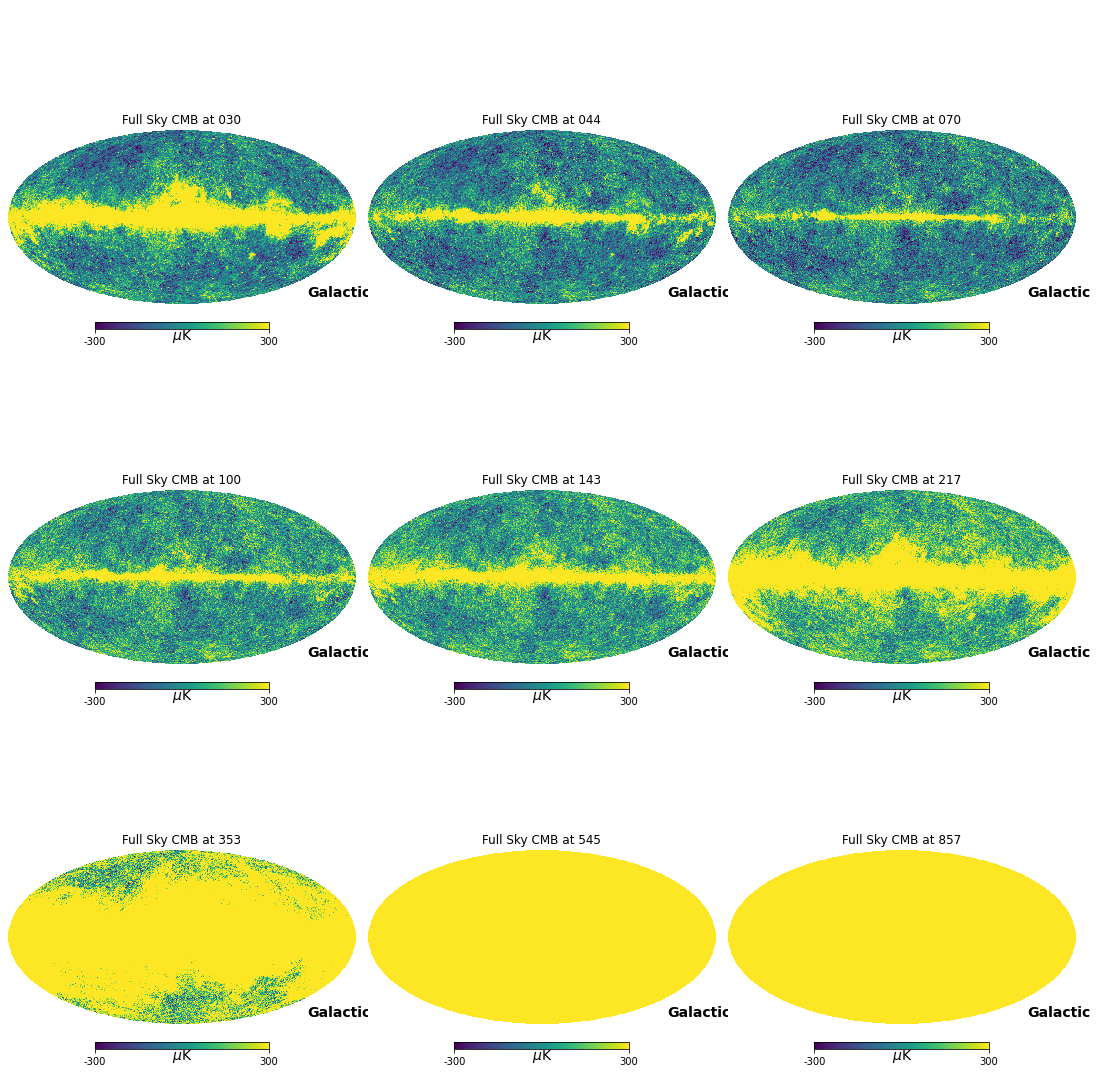

In [110]:
frequencies = PLA_Data_Dict.keys()

# Create a figure with a 3x3 grid of subplots
fig = plt.figure(figsize=(15, 15))

# n = 1
# Iterate over frequencies and corresponding axes
for i, frequency in enumerate(frequencies, start=1):

    # n = n*1.2
    # Create a subplot for the current frequency
    ax = fig.add_subplot(3, 3, i)
    
    # Plot the map for the current frequency
    hp.mollview(
        PLA_Data_Dict[frequency][1]* 1e6,
        coord=["G"],
        title="Full Sky CMB at "+frequency,
        unit=r"$\mu$K",
        # unit="K",
        # norm="hist",
        # min=-1*n,
        # max=1*n,
        min=-300, 
        max=300,
        fig=fig,
        sub=(3, 3, i)  # Specify the subplot position
    )
    ax.axis('off')
    # Add graticule to the map
    # hp.graticule()
    

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()
